In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import utils.behavioral_utils as behavioral_utils
import utils.information_utils as information_utils
import utils.visualization_utils as visualization_utils
import utils.pseudo_classifier_utils as pseudo_classifier_utils
import utils.classifier_utils as classifier_utils

import utils.io_utils as io_utils

import utils.glm_utils as glm_utils
from matplotlib import pyplot as plt
import matplotlib
import utils.spike_utils as spike_utils
import utils.subspace_utils as subspace_utils
from trial_splitters.condition_trial_splitter import ConditionTrialSplitter 
from utils.session_data import SessionData
from constants.behavioral_constants import *


import scipy


In [2]:
PRE_INTERVAL = 1000
POST_INTERVAL = 1000
INTERVAL_SIZE = 100
SMOOTH = 1
EVENT = "StimOnset"
OUTPUT_DIR = "/data/patrick_res/hyak/pseudo"
# path to a dataframe of sessions to analyze
matplotlib.rcParams.update({'font.size': 12})


In [3]:
pairs = pd.read_pickle("/data/patrick_res/sessions/pairs_at_least_3blocks_7sess.pickle")
pairs = pairs.reset_index(drop=True)

### CCGP of belief state value by time

In [6]:
within_dim_accs = []
across_dim_accs = []
overall_accs = []
for (feat1, feat2) in pairs.pair.values:
    within_dim_acc = np.load(os.path.join(OUTPUT_DIR, f"ccgp_belief_state_value_{EVENT}_pair_{feat1}_{feat2}_within_cond_accs.npy"))
    across_dim_acc = np.load(os.path.join(OUTPUT_DIR, f"ccgp_belief_state_value_{EVENT}_pair_{feat1}_{feat2}_across_cond_accs.npy"))
    overall_acc = np.load(os.path.join(OUTPUT_DIR, f"ccgp_belief_state_value_{EVENT}_pair_{feat1}_{feat2}_overall_accs.npy"))
    within_dim_accs.append(within_dim_acc)
    across_dim_accs.append(across_dim_acc)
    overall_accs.append(overall_acc)
within_dim_accs = np.hstack(within_dim_accs)
across_dim_accs = np.hstack(across_dim_accs)
overall_accs = np.hstack(overall_accs)

Text(0.5, 0, 'Time Relative to Stimulus Onset (s)')

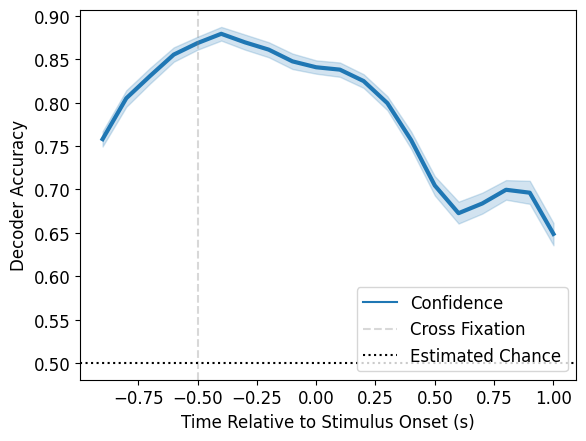

In [7]:
fig, ax = plt.subplots()
visualization_utils.plot_accs_seaborn(
    [overall_accs], 
    ["Confidence"], 
    PRE_INTERVAL, INTERVAL_SIZE, ax)
ax.axvline(-0.5, alpha=0.3, color='gray', linestyle='dashed', label="Cross Fixation")

# # add estimated chance
ax.axhline(1/2, color='black', linestyle='dotted', label="Estimated Chance")
ax.legend()
ax.set_ylabel("Decoder Accuracy")
ax.set_xlabel("Time Relative to Stimulus Onset (s)")


Text(0.5, 0, 'Time Relative to Stimulus Onset (s)')

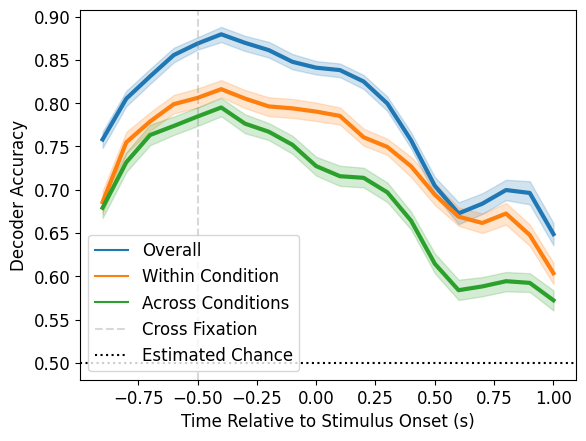

In [8]:
fig, ax = plt.subplots()
visualization_utils.plot_accs_seaborn(
    [overall_accs, within_dim_accs, across_dim_accs, ], 
    ["Overall", "Within Condition", "Across Conditions"], 
    PRE_INTERVAL, INTERVAL_SIZE, ax)
ax.axvline(-0.5, alpha=0.3, color='gray', linestyle='dashed', label="Cross Fixation")
# # add estimated chance
ax.axhline(1/2, color='black', linestyle='dotted', label="Estimated Chance")
ax.legend()
ax.set_ylabel("Decoder Accuracy")
ax.set_xlabel("Time Relative to Stimulus Onset (s)")


### Cross (time) decoding for overall, within condition models

Text(0, 0.5, 'Time Model Trained (s)')

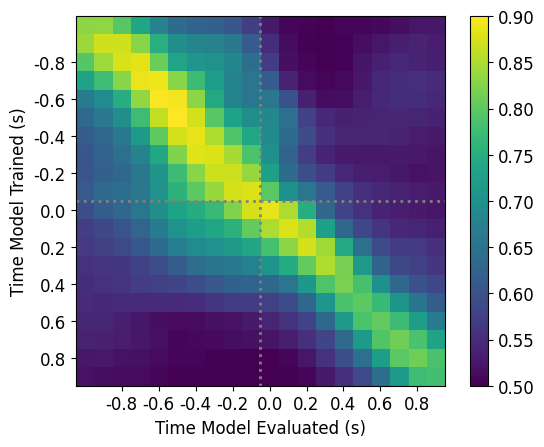

In [11]:
fig, ax = plt.subplots()
all_accs = []
for (feat1, feat2) in pairs.pair.values:
    feat1_cross_accs = np.load(os.path.join(OUTPUT_DIR, f"ccgp_belief_state_value_StimOnset_pair_{feat1}_{feat2}_feat_{feat1}_cross_accs.npy"))
    feat2_cross_accs = np.load(os.path.join(OUTPUT_DIR, f"ccgp_belief_state_value_StimOnset_pair_{feat1}_{feat2}_feat_{feat2}_cross_accs.npy"))
    all_accs.append(feat1_cross_accs)
    all_accs.append(feat2_cross_accs)
all_accs = np.concatenate(all_accs, axis=2)
all_accs = np.mean(all_accs, axis=2)
colors = ax.matshow(all_accs)
colors.set_clim(0.5, 0.9)
fig.colorbar(colors, ax=ax)
ratio = 1000 / 100
# tick_labels = np.array([-1, -0.5, 0, 0.5, 1.0, 1.5])
tick_labels = np.array([-0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8])
tick_pos = (tick_labels + 1) * ratio
ax.set_xticks(tick_pos)
ax.set_xticklabels(tick_labels)
ax.xaxis.tick_bottom()
ax.set_yticks(tick_pos)
ax.set_yticklabels(tick_labels)
# ax.axvline(4.5, color="gray", linestyle="dotted", linewidth=2)
# ax.axhline(4.5, color="gray", linestyle="dotted", linewidth=2)
ax.axvline(9.5, color="gray", linestyle="dotted", linewidth=2)
ax.axhline(9.5, color="gray", linestyle="dotted", linewidth=2)
ax.set_xlabel("Time Model Evaluated (s)")
ax.set_ylabel("Time Model Trained (s)")

Text(0, 0.5, 'Time Model Trained (s)')

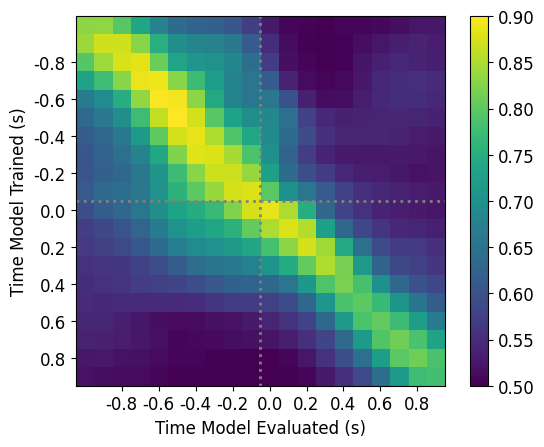

In [10]:
fig, ax = plt.subplots()
overall_accs = []
for (feat1, feat2) in pairs.pair.values:
    cross_accs = np.load(os.path.join(OUTPUT_DIR, f"ccgp_belief_state_value_StimOnset_pair_{feat1}_{feat2}_overall_cross_accs.npy"))
    overall_accs.append(cross_accs)
overall_accs = np.concatenate(overall_accs, axis=2)
overall_accs = np.mean(overall_accs, axis=2)
colors = ax.matshow(all_accs)
colors.set_clim(0.5, 0.9)
fig.colorbar(colors, ax=ax)
ratio = 1000 / 100
# tick_labels = np.array([-1, -0.5, 0, 0.5, 1.0, 1.5])
tick_labels = np.array([-0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8])
tick_pos = (tick_labels + 1) * ratio
ax.set_xticks(tick_pos)
ax.set_xticklabels(tick_labels)
ax.xaxis.tick_bottom()
ax.set_yticks(tick_pos)
ax.set_yticklabels(tick_labels)
# ax.axvline(4.5, color="gray", linestyle="dotted", linewidth=2)
# ax.axhline(4.5, color="gray", linestyle="dotted", linewidth=2)
ax.axvline(9.5, color="gray", linestyle="dotted", linewidth=2)
ax.axhline(9.5, color="gray", linestyle="dotted", linewidth=2)
ax.set_xlabel("Time Model Evaluated (s)")
ax.set_ylabel("Time Model Trained (s)")

### Cosyne 2025 Figure

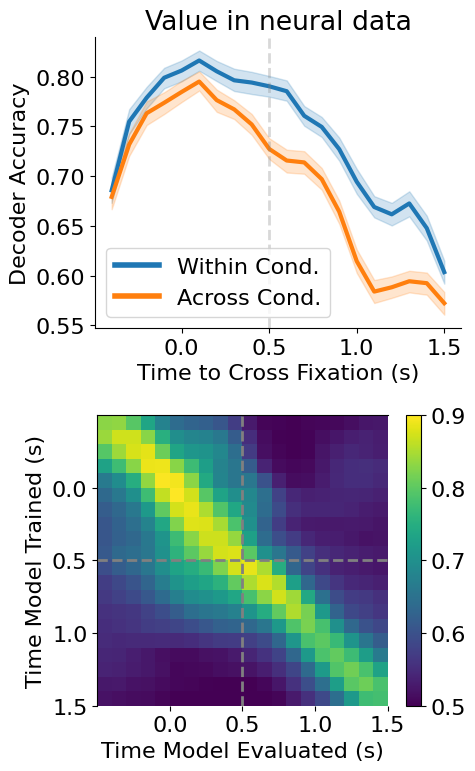

In [12]:
plt.rcParams.update({'font.size': 16})
fig, axs = plt.subplots(2, 1, figsize=(5, 8))
ax = axs[0]
visualization_utils.plot_accs_seaborn(
    # [overall_accs, within_dim_accs, across_dim_accs, ], 
    # ["Overall", "Within Cond.", "Across Cond."], 
    [within_dim_accs, across_dim_accs, ], 
    ["Within Cond.", "Across Cond."], 
    500, 100, ax)
ax.legend()
for line in ax.legend().get_lines():
    line.set_linewidth(4)
# # add estimated chance
ax.axvline(0.5, alpha=0.3, color='gray', linestyle='dashed', linewidth=2)
ax.set_ylabel("Decoder Accuracy")
ax.set_xlabel("Time to Cross Fixation (s)")
ax.spines[['right', 'top']].set_visible(False)
ax.set_title("Value in neural data")

# plt.rcParams.update({'font.size': 14})
ax = axs[1]
colors = ax.matshow(all_accs)
colors.set_clim(0.5, 0.9)
fig.colorbar(colors, ax=ax)
ratio = 1000 / 100
# tick_labels = np.array([-1, -0.5, 0, 0.5, 1.0, 1.5])
# tick_labels = np.array([-0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8])
tick_labels = np.array([0, 0.5, 1.0, 1.5])

tick_pos = (tick_labels + 0.45) * ratio
ax.set_xticks(tick_pos)
ax.set_xticklabels(tick_labels)
ax.xaxis.tick_bottom()
ax.set_yticks(tick_pos)
ax.set_yticklabels(tick_labels)
# ax.axvline(4.5, color="gray", linestyle="dotted", linewidth=2)
# ax.axhline(4.5, color="gray", linestyle="dotted", linewidth=2)
ax.axvline(9.5, color="gray", linestyle="dashed", linewidth=2)
ax.axhline(9.5, color="gray", linestyle="dashed", linewidth=2)
ax.set_xlabel("Time Model Evaluated (s)")
ax.set_ylabel("Time Model Trained (s)")
ax.spines[['bottom', 'right']].set_visible(False)


fig.tight_layout()

fig.savefig("/data/patrick_res/figures/2025_cosyne_abstract/belief_state_value_ccgp_cross.svg")

